# Malaria Detection using CNN, Transfer Learning

# Download The Dataset from 
https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

# Create CNN with Transfer learning

## Import libraries

In [62]:
import tensorflow as tf; print(tf.__version__)

2.10.0


In [63]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# Image details and dataset

In [76]:
# resize images
IMAGE_SIZE =[224,224]

# datasets
train_path = 'Dataset/Train'
test_path = 'Dataset/Test'

In [66]:
# add preprocessing layer infront of VGG
vgg = VGG19(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False) # cuts the first and last layer
vgg.summary()

# don't train existing weights 
for layer in vgg.layers:
    layer.trainable = False

In [67]:
# get numer of output classess based on the folders in the path i.e Parasite (1) and Uninfected (0)
folders = glob('Dataset/Train/*')
folders

['Dataset/Train/Parasite', 'Dataset/Train/Uninfected']

In [68]:
# flatten vgg layers so that dense layers are added
x =Flatten()(vgg.output)
print(x)
# Add dense layer with # of output layers i.e Parasite and Uninfected
prediction = Dense(len(folders), activation = 'softmax')(x) # softmax due to 2 output layers or nodes

# create model
model = Model(inputs = vgg.input, outputs = prediction)
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 25088), dtype=tf.float32, name=None), name='flatten_8/Reshape:0', description="created by layer 'flatten_8'")
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None,

# Create CNN model from scratch

In [69]:
# from tensorflow.keras.layers import MaxPooling2D
# model = Sequential()
# model.add(Conv2D(filters=16, kernel_size=2, padding='same',activation ="relu", input_shape=(16,16,3)))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=32, kernel_size=2, padding='same',activation ="relu", input_shape=(16,16,3)))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=64, kernel_size=2, padding='same',activation ="relu", input_shape=(16,16,3)))
# model.add(MaxPooling2D(pool_size=2))

# model.add(Flatten())
# model.add(Dense(500, activation='relu'))
# model.add(Dense(2, activation = 'softmax')) # softmax since 2 nodes
# model.summary()

# # freeze all layers except last layer, it needs to trained again and again until gets good accuracy

In [70]:
# tell what model cost/loss & optimization method to use
model.compile(loss = "categorical_crossentropy", # because at last i will have 2 nodes
                       optimizer = 'adam', metrics = ["accuracy"])

In [71]:
# use IMAGE DATA GENERATOR to import images from dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# do image data augmentation for training data to create more data
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range= 0.2, horizontal_flip=True)
# for test data, no image augmentation needed. Only rescaling is needed so that every pixel in the image ranges between 1 to 255 (or scale 0 to 1)
test_datagen= ImageDataGenerator(rescale= 1./255)
test_datagen

In [72]:
# make sure to provide same target size as initialized for image
training_set = train_datagen.flow_from_directory('Dataset/Train', target_size = (224,224), batch_size = 32, class_mode = 'categorical')
training_set

Found 416 images belonging to 2 classes.


In [73]:
test_set = test_datagen.flow_from_directory('Dataset/Test', target_size = (224,224), batch_size = 32, class_mode = 'categorical')
test_set

Found 134 images belonging to 2 classes.


In [84]:
# fit the model
r = model.fit(training_set, validation_data=test_set, epochs=3, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Epoch 1/3
13/13 [==============================] - 79s 6s/step - loss: 0.2308 - accuracy: 0.9062 - val_loss: 0.3166 - val_accuracy: 0.8955
Epoch 2/3
13/13 [==============================] - 78s 6s/step - loss: 0.2198 - accuracy: 0.9399 - val_loss: 0.3435 - val_accuracy: 0.8284
Epoch 3/3
13/13 [==============================] - 79s 6s/step - loss: 0.2738 - accuracy: 0.8750 - val_loss: 0.2799 - val_accuracy: 0.9104


# plot the loss

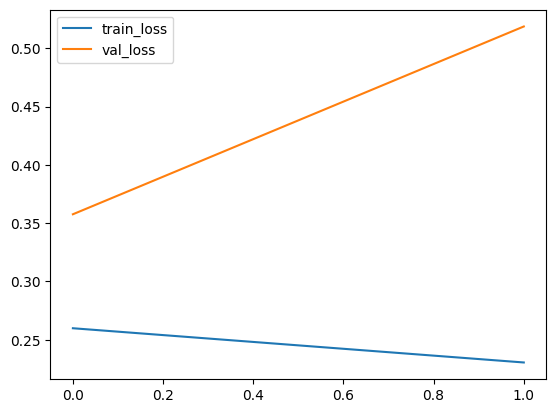

<Figure size 640x480 with 0 Axes>

In [82]:
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('Lossval_loss')

# plot accuracy

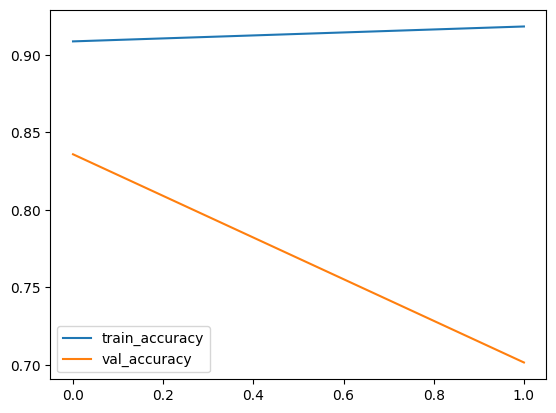

<Figure size 640x480 with 0 Axes>

In [83]:
plt.plot(r.history['accuracy'], label='train_accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()
plt.savefig('Lossval_loss')

In [85]:
# save the model as h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

## make predictions

In [90]:
# since dense layer has 2 nodes, get 2 values in output (~1 is parasitic, 0 is uninfected)
y_pred = model.predict(test_set)
y_pred[:5]

5/5 [==============================] - 19s 4s/step


array([[0.6078018 , 0.3921982 ],
       [0.40881628, 0.5911838 ],
       [0.84646577, 0.15353423],
       [0.9624524 , 0.03754766],
       [0.6621482 , 0.33785185]], dtype=float32)

In [91]:
# convert values into max number
y_pred = np.argmax(y_pred, axis=1) # get max value in every row
y_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1])

# Read images and predict whether infected or not

In [103]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
# load saved model
model = load_model('model_vgg19.h5')
img = image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224)) # same size as input image size

x = image.img_to_array(img)
print(x.shape)
print(x)

(224, 224, 3)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [104]:
# rescaling the new image, sice rescaling applied to test data 
x = x/255 

# then, expand dimensionality of image with respect to axis=0
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
print(img_data)
print(img_data.shape)

[[[[-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   ...
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]]

  [[-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   ...
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]]

  [[-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   ...
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]]

  ...

  [[-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   ...
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]]

  [[-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   ...
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 

In [107]:
# predict the image 
model.predict(img_data)

# then, get the max value
a = np.argmax(model.predict(img_data), axis=1)
print(a)

if a == 1:
    print('parasitic and infected')
else:
    print('uninfected')

1/1 [==============================] - 0s 209ms/step
[1]
parasitic and infected
